# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Okta Agnes Ladyagatha Manik
- Email: oktaagnesmanik@gmail.com
- Id Dicoding:B244048F

## Persiapan

### Menyiapkan library yang dibutuhkan

In [110]:
!pip install sqlalchemy
!pip install joblib
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import os
from sklearn.tree import DecisionTreeClassifier

### Menyiapkan data yang akan diguankan

## Data Understanding

In [111]:
df =  pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv",
    sep=';',
    encoding='windows-1252'
)
df.head()


,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [112]:
df

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [113]:
# Cek missing value hasil feature engineering dengan fungsi isnull()
df.isnull().sum()

,0
ï»¿Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [114]:
# mengecek apakah terdapat dua atau lebih data yang memiliki nilai yang sama pada semua atributnya (mengecek duplikat)
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [115]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_col = df.select_dtypes(include=['object','category']).columns

num_count = len(num_cols)
cat_count = len(cat_col)

print(f"Jumlah kolom numerikal: {num_count}")
print(f"Jumlah kolom kategorikal: {cat_count}")

Jumlah kolom numerikal: 36
Jumlah kolom kategorikal: 1


In [116]:
#Cek data Numerik
num_cols

Index(['ï»¿Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_

In [117]:
#Cek data kategorial
cat_col

Index(['Status'], dtype='object')

In [118]:
df.describe(include='all')

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


 Univariate Analysis

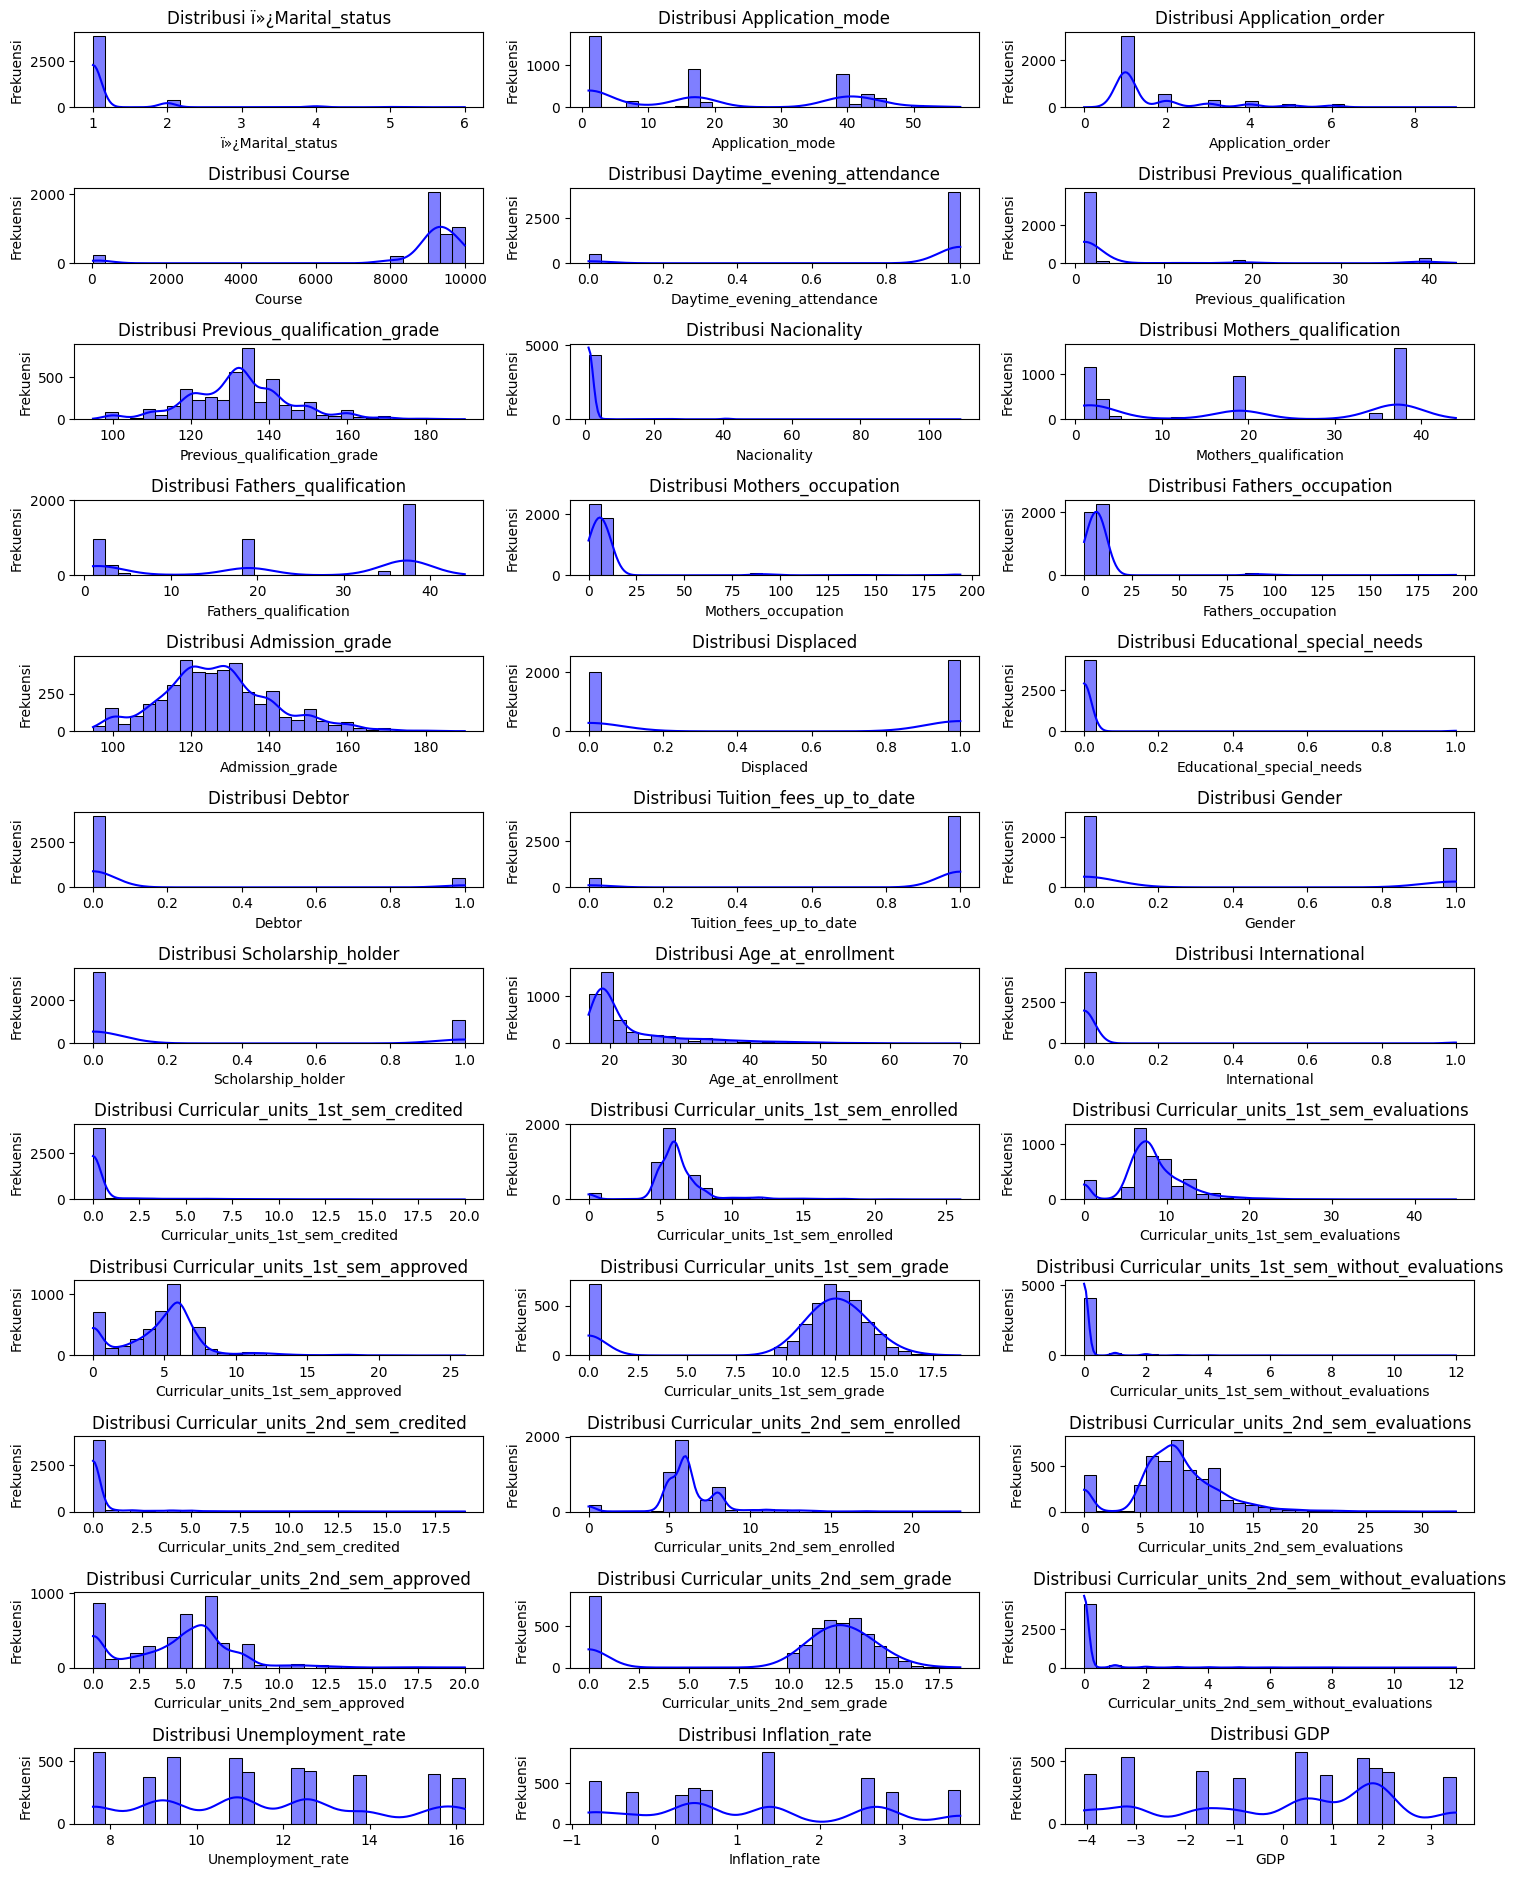

In [119]:
# Identifikasi kolom numerik
numerical_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]

# Visualisasi distribusi data numerik
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue') # Changed 'df' to 'edutech_df'
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

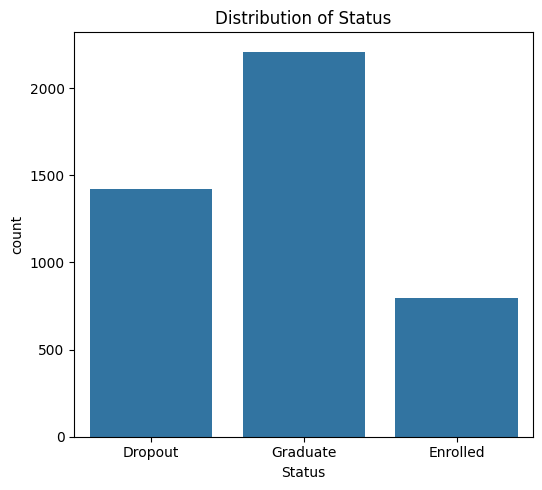

In [120]:
# Identifikasi Kolom Objek
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_col, 1):
    plt.subplot(len(cat_col) // 3 + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks()
plt.tight_layout()
plt.show()

Multivariate Analysis

In [121]:
status_df = df[df["Status"] == 'Dropout']
status_df

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,2,39,1,9773,1,1,100.0,1,37,37,...,0,6,10,6,11.666667,0,12.7,3.7,-1.70,Dropout
4411,1,44,1,9130,1,39,150.0,1,37,37,...,0,6,11,3,13.333333,0,13.9,-0.3,0.79,Dropout
4415,4,39,1,9500,1,19,133.1,1,37,37,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,Dropout
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout


In [122]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

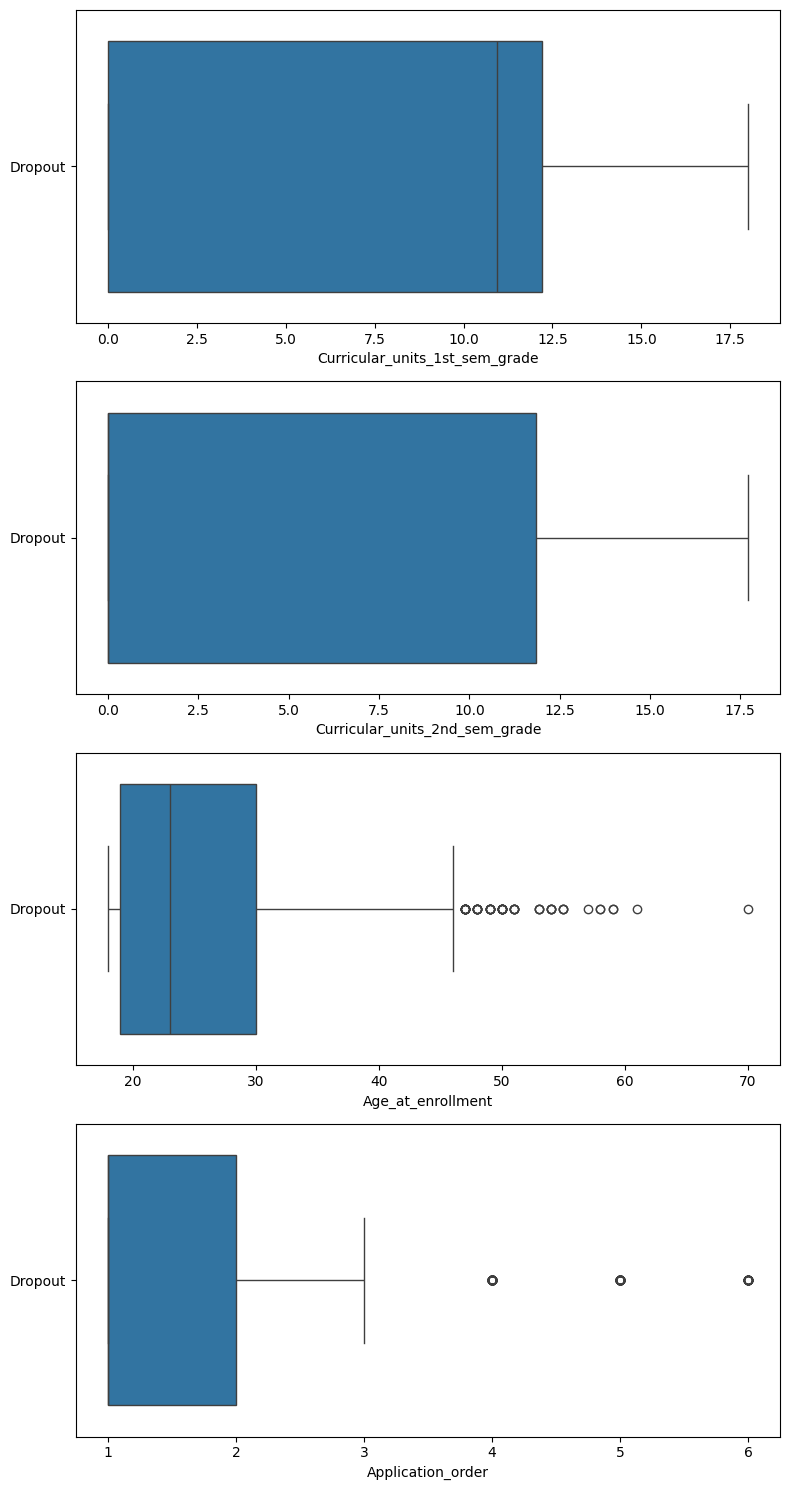

In [123]:

numerical_dis_plot(
    features=["Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade", "Age_at_enrollment", "Application_order"],
    df=status_df,
    segment_feature="Status"
)

In [124]:
columns_ketegorikal = ['Marital_status', 'Course', 'Nacionality', 'Mothers_qualification',
                       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation']

def plot_bar_distribution(data, columns, color='blue', figsize=(4, 3)):
    for column in columns:
        # Check if the column exists in the DataFrame before accessing it
        if column in data.columns:
            value_counts = data[column].value_counts()
            plt.figure(figsize=figsize)
            value_counts.plot(kind='bar', color=color)
            plt.title(f'Distribusi {column} Status Pada Siswa Dropout')
            plt.xlabel(column)
            plt.ylabel('Jumlah')
            plt.show()
        else:
            print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.") # Print a message if the column is not found

Kolom 'Marital_status' tidak ditemukan dalam DataFrame.


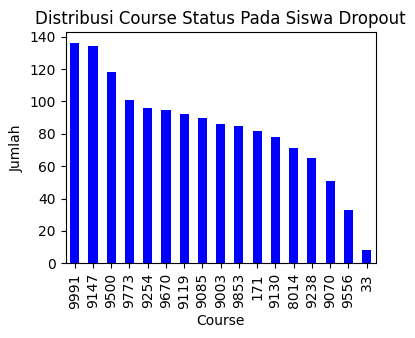

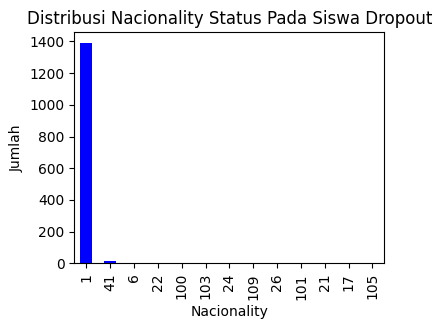

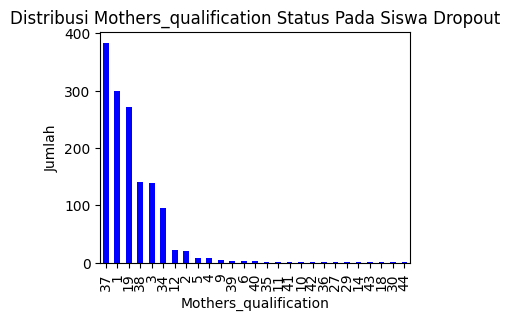

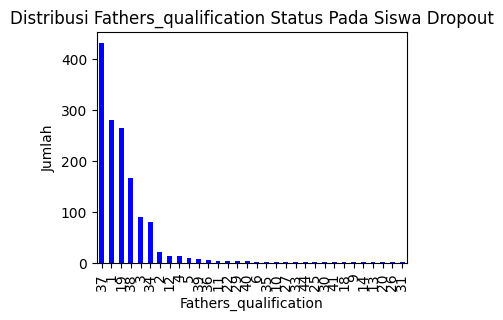

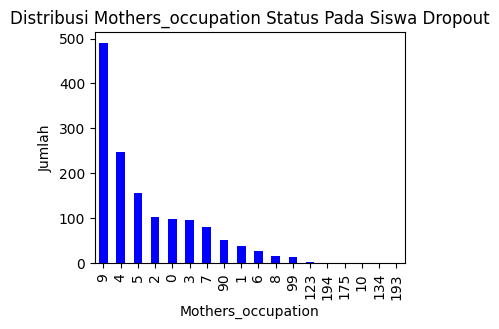

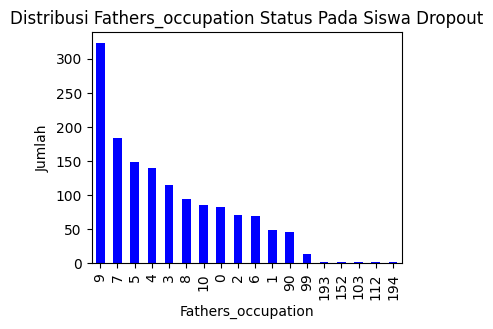

In [125]:
plot_bar_distribution(status_df, columns_ketegorikal)

korelasi matriks


<ipython-input-126-2d58473c246d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapping['Status'] = df['Status'].replace(status_mapping)
<ipython-input-126-2d58473c246d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")


Factors correlated with Status:
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evaluations            0.044362

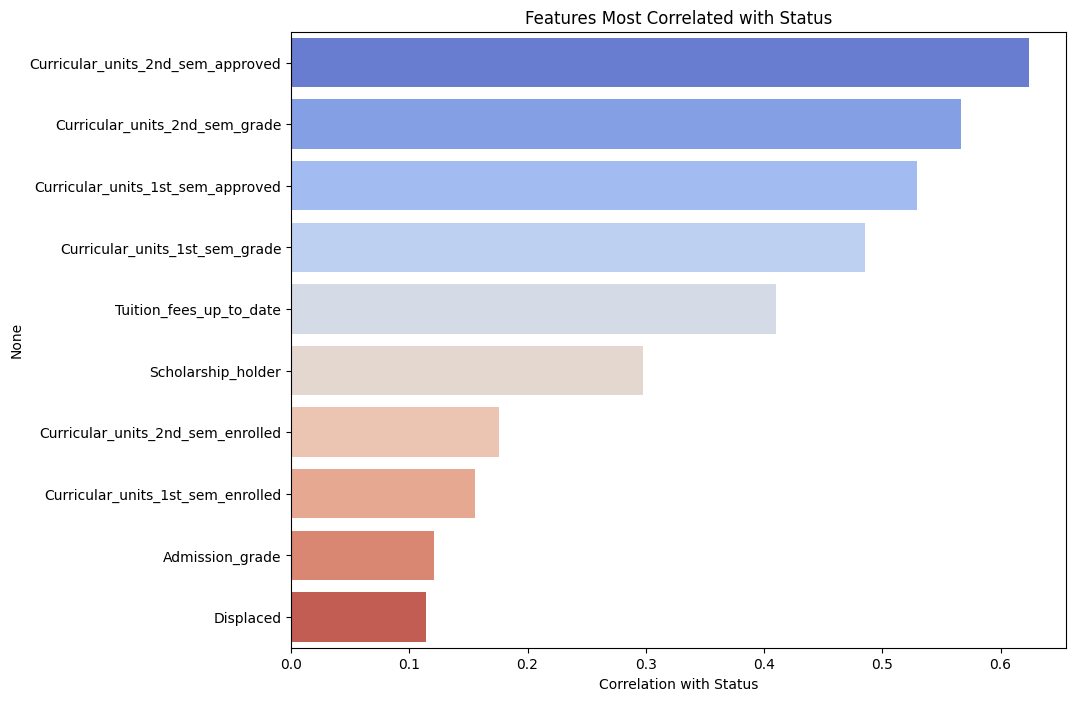

In [126]:
status_mapping = {'Dropout': 0,'Enrolled':1,'Graduate': 2}
df_mapping = df.copy()
df_mapping['Status'] = df['Status'].replace(status_mapping)

# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal (kecuali kolom target 'Status')
df_encoded = pd.get_dummies(df_mapping, columns=[col for col in categorical_columns if col != 'Status'], drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Status'
status_correlation = correlation_matrix["Status"].sort_values(ascending=False)

factors = status_correlation
factors = factors.drop('Status')

print("Factors correlated with Status:")
print(factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")
plt.title("Features Most Correlated with Status")
plt.xlabel("Correlation with Status")
plt.show()

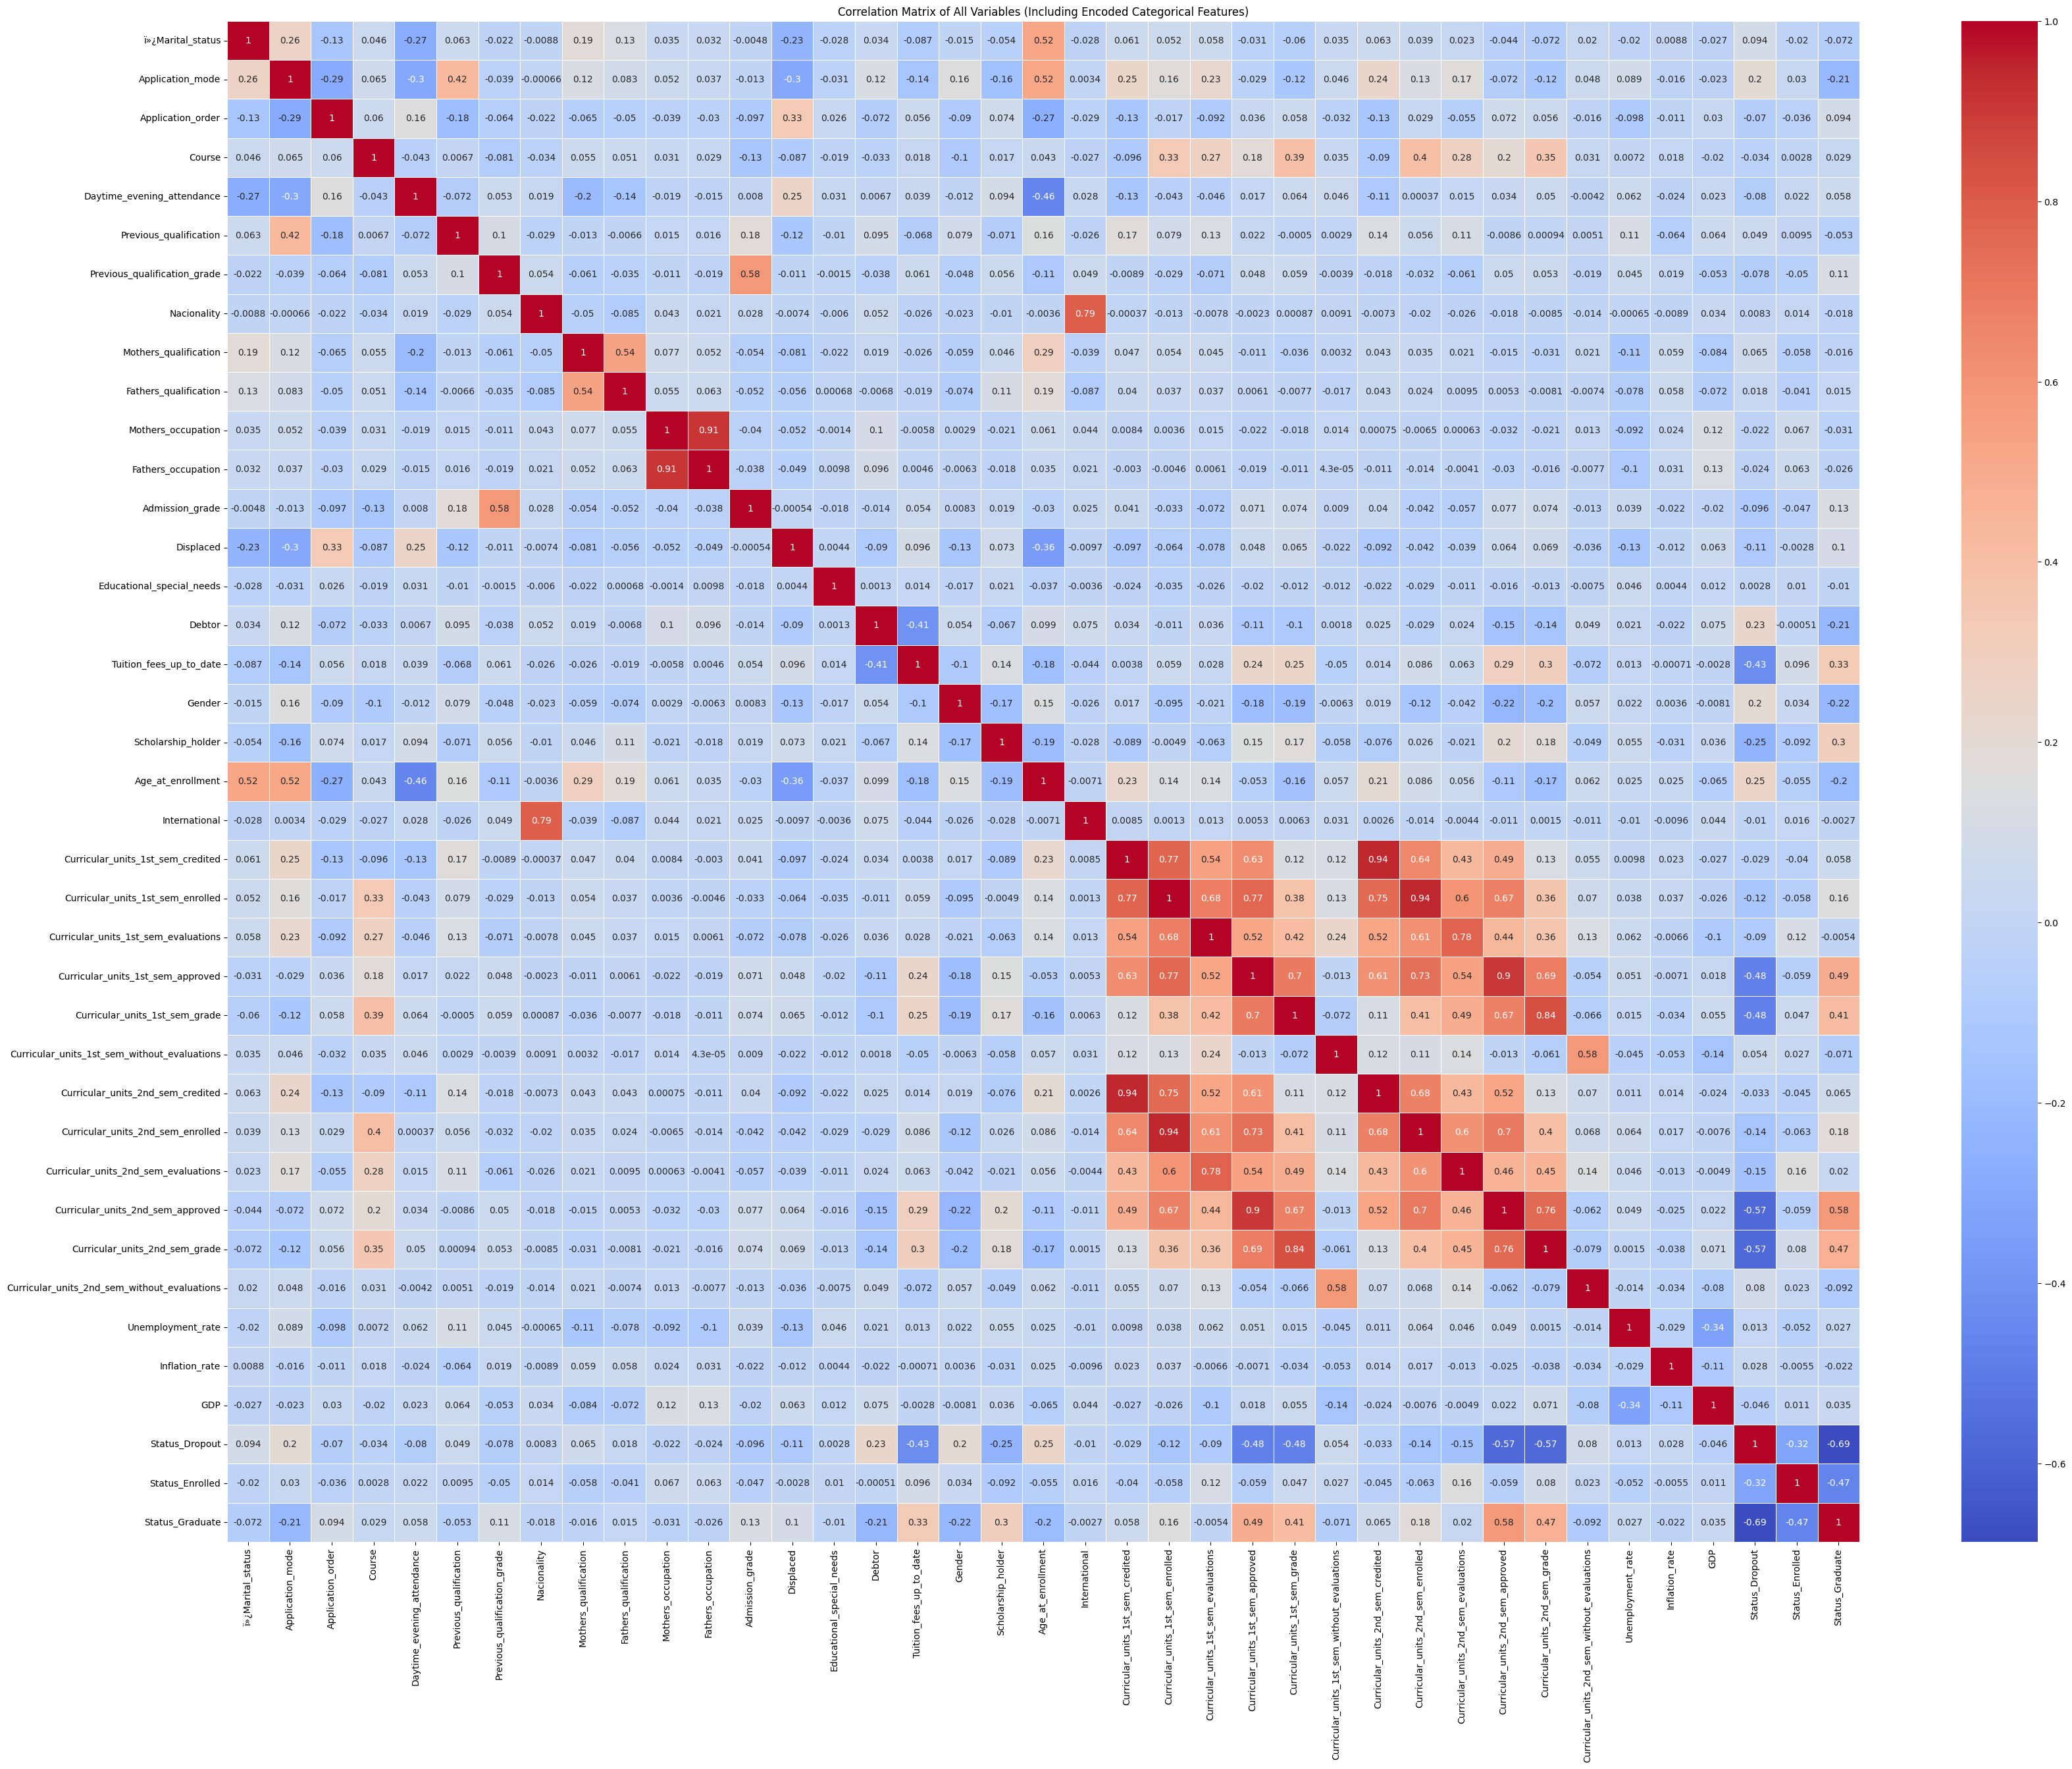

In [127]:
# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=False)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables (Including Encoded Categorical Features)')
plt.show()

## Data Preparation / Preprocessing

standarisasi numerikal

In [128]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [129]:
df_scaler = df[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]

# Standardisasi fitur numerik
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_scaler)

In [130]:
import os
# Membuat folder baru bernama "folder_baru" di dalam direktori utama
os.makedirs("/content/model", exist_ok=True)

# Cek apakah folder berhasil dibuat
print("Folder berhasil dibuat:", os.path.exists("/content/model"))

# Pastikan folder "model" ada
os.makedirs("model", exist_ok=True)

Folder berhasil dibuat: True


In [131]:
# Menyimpan model ke dalam folder "model/"
joblib.dump(scaler, "model/model_scaler.joblib")

print("Model berhasil disimpan di 'predict/model_rf.joblib'")

Model berhasil disimpan di 'predict/model_rf.joblib'



One-hot Encoding

In [132]:
df_clean = df.copy()
df_clean = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=False)
df_clean = df_clean.astype(int)

Train Test Split

In [133]:
# Memisahkan fitur (X) dan target (y)
X = df_clean.drop(['Status_Dropout','Status_Enrolled','Status_Graduate'], axis=1)
X = X[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]
y = df_clean[['Status_Dropout','Status_Enrolled','Status_Graduate']]

# Membagi data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Random Forest

In [134]:
rdf_model = RandomForestClassifier(random_state=123)

# Parameter grid
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15 ,20],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

# Menampilkan hasil grid search
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}


In [135]:
# Menampilkan hasil grid search
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}


In [136]:
rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=15,
    random_state=123,
    max_features='sqrt',
    n_estimators=200,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Menyimpan model
joblib.dump(rf_model, "model/model_rf.joblib")

['model/model_rf.joblib']

Decision Tree

In [137]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train, y_train)

print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': None}


In [138]:
dtree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=6,
    max_features='None'
)

tree_model.fit(X_train, y_train)
joblib.dump(dtree_model, "model/dtree_model.joblib")

['model/dtree_model.joblib']

## Evaluation

Random Forest

In [139]:
# Prediksi menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Import accuracy_score and classification_report from sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi Random Forest
print("Random Forest Evaluation:")
acc = accuracy_score(y_test, y_pred_rf) * 100
report = classification_report(y_test, y_pred_rf)
print(f"Accuracy: ", acc)
print(report)

Random Forest Evaluation:
Accuracy:  71.41242937853107
              precision    recall  f1-score   support

           0       0.86      0.72      0.79       316
           1       0.53      0.29      0.38       151
           2       0.79      0.86      0.82       418

   micro avg       0.79      0.71      0.75       885
   macro avg       0.73      0.62      0.66       885
weighted avg       0.77      0.71      0.73       885
 samples avg       0.71      0.71      0.71       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decicion Tree

In [140]:
# Prediksi menggunakan Decicion Tree
y_pred_dt = tree_model.predict(X_test)

# Evaluasi Random Forest
print("Random Forest Evaluation:")
acc = accuracy_score(y_test, y_pred_dt) * 100
report = classification_report(y_test, y_pred_dt)
print(f"Accuracy: ", acc)
print(report)

Random Forest Evaluation:
Accuracy:  67.2316384180791
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       316
           1       0.35      0.42      0.38       151
           2       0.77      0.76      0.77       418

   micro avg       0.68      0.67      0.68       885
   macro avg       0.63      0.62      0.62       885
weighted avg       0.70      0.67      0.68       885
 samples avg       0.67      0.67      0.67       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
import shutil
from google.colab import files

# Kompres folder 'predict' menjadi ZIP
shutil.make_archive("/content/model", 'zip', "/content/model")

# Unduh ZIP file
files.download("/content/model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
# Menyimpan DataFrame ke file CSV
status_df.to_csv('status_student.csv', index=False)

print("Data berhasil disimpan sebagai 'data_siswa.csv'.")

Data berhasil disimpan sebagai 'data_siswa.csv'.
